$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 4: Classification with LDA and Logistic Regression

Bradley Pospeck

## Overview

Compare LDA and linear and nonlinear logistic regression applied to two data sets.

In [2]:
s = 'a'
s = chr(ord(s)+1)
s

'b'

## Imports

In [53]:
import numpy as np
import mlutils as ml
import neuralnetworks as nn
import qdalda as ql
import matplotlib.pyplot as plt
%matplotlib inline

## Functions

In [54]:
def trainLDA(X,T,parameters=0):
    lda = ql.LDA()
    lda.train(X,T)
    return lda

In [55]:
def evaluateLDA(model,X,T):
    predicted,_,_ = model.use(X)
    percentCorrect = ml.percentCorrect(predicted,T)
    return percentCorrect

In [74]:
def trainNN(X,T,parameters):
    nnet = nn.NeuralNetworkClassifier(X.shape[1],parameters[0],np.unique(T).shape[0])
    nnet.train(X,T,nIterations=parameters[1])
    return nnet

In [75]:
def evaluateNN(model,X,T):
    predicted = model.use(X)
    percentCorrect = ml.percentCorrect(predicted,T)
    return percentCorrect

## Required Code

Download [nn2.tar](http://www.cs.colostate.edu/~anderson/cs480/notebooks/nn2.tar) and extract its contents, which are

* `neuralnetworks.py`
* `scaledconjugategradient.py`
* `mlutils.py`

as discussed in lecture. 

Write the following functions that train and evaluate LDA and neural network logistic regression models.

* `model = trainLDA(X,T,parameters)`
* `percentCorrect = evaluateLDA(model,X,T)`
* `model = trainNN(X,T,parameters)`
* `percentCorrect = evaluateNN(model,X,T)`
The `parameters` argument for `trainNN` is a list of the hidden layers structure and the number of SCG iterations, as in the previous assignment. The value of the `parameters` argument for `trainLDA` is not used.

Use the `trainValidateTestKFoldsClassification` function in `mlutils.py` to apply the above functions. 

The `NeuralNetworkClassifier` class in the above `neuralnetworks.py` file allows you to specify 0 hidden units.  This creates a neural network with just the output layer designed to do classification.  In other words, specify 0 hidden units to apply linear logistic regression.

If you prefer to develop your python code in a separate editor or IDA, you may do so.  If it is stored in a file called `A4mysolution.py`, you can use it here by executing the following cell.

<font color="red">REMEMBER</font> to remove our comment out the following import statement and instead, paste in all of your function definintions into this notebook.

In [20]:
# from A4mysolution import * 

Here is an example, using our automobile MPG data.  This time, instead of predicting the actual MPG values, we quantize the MPG values into 5 intervals, and classify each sample as being in one of these 5 intervals.

In [3]:
def makeMPGData(filename='auto-mpg.data'):
    def missingIsNan(s):
        return np.nan if s == b'?' else float(s)
    data = np.loadtxt(filename, usecols=range(8), converters={3: missingIsNan})
    print("Read",data.shape[0],"rows and",data.shape[1],"columns from",filename)
    goodRowsMask = np.isnan(data).sum(axis=1) == 0
    data = data[goodRowsMask,:]
    print("After removing rows containing question marks, data has",data.shape[0],"rows and",data.shape[1],"columns.")
    X = data[:,1:]
    T = data[:,0:1]
    Xnames =  ['cylinders','displacement','horsepower','weight','acceleration','year','origin']
    Tname = 'mpg'
    return X,T,Xnames,Tname

In [4]:
def makeMPGClasses(T):
    bounds = np.arange(5,45,10)
    Tclasses = -np.ones(T.shape).astype(np.int)
    for i,mpg in enumerate(T):
        for k in range(len(bounds)-1):
            if bounds[k] < mpg <= bounds[k+1]:
                Tclasses[i] = bounds[k+1]
        if Tclasses[i] == -1:
            Tclasses[i] = 50  # max mpg is 46.6
    return Tclasses

In [5]:
X,T,Xnames,Tname = makeMPGData('auto-mpg.data')
Tclasses = makeMPGClasses(T)
classes,counts = np.unique(Tclasses,return_counts=True)
print('classes',classes)
print('counts',counts)

Read 398 rows and 8 columns from auto-mpg.data
After removing rows containing question marks, data has 392 rows and 8 columns.
classes [15 25 35 50]
counts [ 69 167 123  33]


In [6]:
def printResults(label,results):
    print('{:4s} {:>20s}{:>8s}{:>8s}{:>8s}'.format('Algo','Parameters','TrnAcc','ValAcc','TesAcc'))
    print('-------------------------------------------------')
    for row in results:
        # 20 is expected maximum number of characters in printed parameter value list
        print('{:>4s} {:>20s} {:7.2f} {:7.2f} {:7.2f}'.format(label,str(row[0]),*row[1:]))

In [7]:
resultsLDA = ml.trainValidateTestKFoldsClassification( trainLDA,evaluateLDA, X,Tclasses, [None],
                                                       nFolds=6, shuffle=False,verbose=False)
printResults('LDA:',resultsLDA)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
LDA:                 None   79.21   70.53   56.04
LDA:                 None   75.58   66.36   80.23
LDA:                 None   78.46   67.19   82.72
LDA:                 None   77.72   68.07   82.89
LDA:                 None   79.75   69.57   69.01
LDA:                 None   81.23   72.96   51.52


In [9]:
resultsNN = ml.trainValidateTestKFoldsClassification( trainNN,evaluateNN, X,Tclasses, 
                                                     [ [ [0], 10], [[10], 100] ],
                                                     nFolds=6, shuffle=False,verbose=False)
printResults('NN:',resultsNN)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
 NN:            [[0], 10]   83.16   74.72   51.65
 NN:          [[10], 100]   92.21   66.58   89.53
 NN:          [[10], 100]   93.59   71.86   72.84
 NN:          [[10], 100]   92.66   72.98   76.32
 NN:            [[0], 10]   80.50   73.58   61.97
 NN:          [[10], 100]   94.32   77.44   60.61


In [10]:
lda = ql.LDA()
lda.train(X,Tclasses)
predictedClasses,_,_ = lda.use(X)
ml.confusionMatrix(Tclasses,predictedClasses,classes); # <- semi-colon prevents printing of returned result

      15   25   35   50
    ------------------------
15 | 91.3  8.7  0    0     (69 / 69)
25 | 11.4 68.9 18.6  1.2   (167 / 167)
35 |  0    8.9 68.3 22.8   (123 / 123)
50 |  0    0   18.2 81.8   (33 / 33)


## Chords Data

The first data set can be found [here](http://archive.ics.uci.edu/ml/datasets/Bach+Choral+Harmony) and has to do with chord labels based on various given pitch information.

The attributes are as follows:
    1. Choral ID: corresponding to the file names from Bach Central
    2. Event number: index (starting from 1) of the event inside the chorale.
    3. C
    4. C#/Db
    5. D
    6. D#/Eb
    7. E
    8. F
    9. F#/Gb
    10. G
    11. G#/Ab
    12. A
    13. A#/Bb
    14. B 
    15. Bass: Pitch class of the bass note 
    16. Meter: integers from 1 to 5. Lower numbers denote less accented events, 
        higher numbers denote more accented events. 
    17. Chord label: Chord resonating during the given event.

Attributes 3-14 are pitch classes: there is a YES/NO (0/1) depending on whether a given pitch is present. The choral ID doesn't seem like it should affect the chord at all, so I'm dropping that attribute.

In [71]:
noYes = {'NO':0,'YES':1}
basePitch = {'C':0,'C#':1,'Db':1,'D':2,'D#':3,'Eb':3,'E':4,'F':5,'F#':6,'Gb':6,'G':7,'G#':8,'Ab':8,'A':9,'A#':10,'Bb':10,'B':11}
chord = {'D_M':0,'G_M':1,'C_M':2,'F_M':3,'A_M':4,'BbM':5,'E_M':6,'A_m':7,'E_m':8,'G_m':9,'B_m':10,'D_m':11,'EbM':12,'C_m':13,
        'F#m':14,'B_M':15,'F#M':16,'C_M7':17,'D_M7':18,'E_M7':19,'F_M7':20,'G_M7':21,'A_M7':22,'B_M7':23,'F_m':24,'C#M':25,
        'AbM':26,'F#M7':27,'D_m7':28,'Bbm':29,'C#m':30,'E_m7':31,'DbM':32,'C_m7':33,'B_m7':34,'F#m7':35,'G_m7':36,'B_d':37,
         'C_m6':38,'D_M4':39,'C_M4':40,'A_M4':41,'C#d7':42,'F#d':43,'E_M4':44,'F_M4':45,'E_m6':46,'F#M4':47,'D_m6':48,'G#d':49,
        'A_m7':50,'C#d':51,'A_m6':52,'C#m7':53,'G_M4':54,'B_d7':55,'C#M7':56,'F_m7':57,'D#d':58,'F#m6':59,'E_d':60,'G#m':61,
         'Bbm6':62,'C_M6':63,'G#d7':64,'A#d':65,'A_d':66,'Bbd':67,'D#d7':68,'F_M6':69,'Dbm':70,'A#d7':71,'D_d7':72,'D_M6':73,
        'F_m6':74,'B_M4':75,'G_M6':76,'G_d':77,'F_d':78,'G_m6':79,'Dbm7':80,'BbM7':81,'C#d6':82,'Abm':83,'C_d7':84,'A_m4':85,
        'Dbd':86,'Dbd7':87,'C#M4':88,'C_d6':89,'A_M6':90,'D#m':91,'D#M':92,'B_m6':93,'Ebd':94,'F_d7':95,'DbM7':96,'EbM7':97,
        'G#M':98,'F#d7':99,'D#d6':100,'Abd':101,'F':102}

In [72]:
def bs(bytes):
    '''Convert bytes to string and remove double quotes'''
    #print(bytes)
    temp = str(bytes,'utf-8').replace("'","")
    print(temp.strip())
    return temp.strip()

converters = {1: lambda event: bs(event),
             2: lambda p: noYes[bs(p)],
             3: lambda p: noYes[bs(p)],
             4: lambda p: noYes[bs(p)],
             5: lambda p: noYes[bs(p)],
             6: lambda p: noYes[bs(p)],
             7: lambda p: noYes[bs(p)],
             8: lambda p: noYes[bs(p)],
             9: lambda p: noYes[bs(p)],
             10: lambda p: noYes[bs(p)],
             11: lambda p: noYes[bs(p)],
             12: lambda p: noYes[bs(p)],
             13: lambda p: noYes[bs(p)],
             14: lambda bp: basePitch[bs(bp)],
             15: lambda meter: bs(meter),
             16: lambda c: chord[bs(c)]}

In [73]:
converters[16](b'F#m')

F#m


14

In [ ]:
chords = np.loadtxt('jsbach_chorals_harmony.data',delimiter=',',usecols=range(1,17),converters=converters)
chords

1
YES
NO
NO
NO
NO
YES
NO
NO
NO
YES
NO
NO
F
3
F_M
2
YES
NO
NO
NO
YES
NO
NO
YES
NO
NO
NO
NO
E
5
C_M
3
YES
NO
NO
NO
YES
NO
NO
YES
NO
NO
NO
NO
E
2
C_M
4
YES
NO
NO
NO
NO
YES
NO
NO
NO
YES
NO
NO
F
3
F_M
5
YES
NO
NO
NO
NO
YES
NO
NO
NO
YES
NO
NO
F
2
F_M
6
NO
NO
YES
NO
NO
YES
NO
NO
NO
YES
NO
NO
D
4
D_m
7
NO
NO
YES
NO
NO
YES
NO
NO
NO
YES
NO
NO
D
2
D_m
8
YES
NO
NO
NO
NO
YES
NO
NO
NO
YES
NO
NO
A
3
F_M
9
YES
NO
NO
NO
NO
YES
NO
NO
NO
YES
NO
NO
A
2
F_M
10
NO
NO
YES
NO
NO
YES
NO
NO
NO
NO
YES
NO
Bb
5
BbM
11
NO
NO
YES
NO
NO
YES
NO
NO
NO
NO
YES
NO
Bb
1
BbM
12
YES
NO
YES
NO
NO
YES
NO
NO
NO
YES
YES
NO
C
2
BbM
13
YES
NO
YES
NO
NO
YES
NO
YES
NO
NO
YES
NO
C
1
BbM
14
NO
NO
YES
NO
NO
YES
NO
NO
NO
NO
YES
NO
D
3
BbM
15
NO
NO
YES
NO
YES
YES
NO
YES
NO
NO
YES
NO
E
2
BbM
16
YES
NO
NO
NO
NO
YES
NO
NO
NO
YES
NO
NO
F
4
F_M
17
YES
NO
NO
NO
NO
YES
NO
NO
NO
YES
NO
NO
F
3
F_M
18
NO
NO
YES
NO
NO
YES
NO
NO
NO
NO
YES
NO
Bb
5
BbM
19
NO
NO
YES
NO
NO
YES
NO
YES
NO
NO
YES
NO
Bb
2
BbM
20
NO
NO
YES
NO
NO
YES
NO
NO
NO
YES
YES
NO
Bb
1


IndexError: list index out of range

> c:\users\brad pospeck\anaconda3\lib\site-packages\numpy\lib\npyio.py(923)<listcomp>()
    921                 continue
    922             if usecols:
--> 923                 vals = [vals[i] for i in usecols]
    924             if len(vals) != N:
    925                 line_num = i + skiprows + 1

ipdb> print(usecols)
*** NameError: name 'usecols' is not defined
ipdb> print(vals)
[b'000206b_', b'7', b' NO', b' NO', b'YES', b' NO', b' NO', b' NO', b'YES', b' NO', b' NO', b'YES', b' NO', b' NO', b'F']
ipdb> print(i)
15
ipdb> print(vals[i])
*** IndexError: list index out of range


In [79]:
%pdb

Automatic pdb calling has been turned ON


In [19]:
chords

array([["b'1'", "b'YES'", "b' NO'", ..., "b' NO'", "b' NO'", "b'F'"],
       ["b'2'", "b'YES'", "b' NO'", ..., "b' NO'", "b' NO'", "b'E'"],
       ["b'3'", "b'YES'", "b' NO'", ..., "b' NO'", "b' NO'", "b'E'"],
       ..., 
       ["b'107'", "b'YES'", "b' NO'", ..., "b' NO'", "b' NO'", "b'C'"],
       ["b'108'", "b'YES'", "b' NO'", ..., "b'YES'", "b' NO'", "b'C'"],
       ["b'109'", "b' NO'", "b' NO'", ..., "b' NO'", "b' NO'", "b'F'"]], 
      dtype='<U6')

## Glass Data

The 2nd set of data can be found [here](http://archive.ics.uci.edu/ml/datasets/Glass+Identification) and has 214 data points for glass identification based on composition and a refractive index. The attributes are as follows:

    1. Id number: 1 to 214 
    2. RI: refractive index
    3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
    4. Mg: Magnesium
    5. Al: Aluminum
    6. Si: Silicon
    7. K: Potassium 
    8. Ca: Calcium 
    9. Ba: Barium 
    10. Fe: Iron
    11. Type of glass

Since the 1st attribute is just an identification number, I will be leaving that out of the analysis, leaving me with only 10 attributes. The types of glass range from 1-7 and are setup like this:

    1. building_windows_float_processed
    2. building_windows_non_float_processed
    3. vehicle_windows_float_processed
    4. vehicle_windows_non_float_processed
    5. containers
    6. tableware
    7. headlamps
    

In [64]:
glass = np.loadtxt('glass.data',delimiter=',',usecols=range(1,11))
glass

array([[  1.52101,  13.64   ,   4.49   , ...,   0.     ,   0.     ,   1.     ],
       [  1.51761,  13.89   ,   3.6    , ...,   0.     ,   0.     ,   1.     ],
       [  1.51618,  13.53   ,   3.55   , ...,   0.     ,   0.     ,   1.     ],
       ..., 
       [  1.52065,  14.36   ,   0.     , ...,   1.64   ,   0.     ,   7.     ],
       [  1.51651,  14.38   ,   0.     , ...,   1.57   ,   0.     ,   7.     ],
       [  1.51711,  14.23   ,   0.     , ...,   1.67   ,   0.     ,   7.     ]])

In [65]:
X = glass[:,0:9]
T = glass[:,9:]
X,T,X.shape,T.shape

(array([[  1.52101,  13.64   ,   4.49   , ...,   8.75   ,   0.     ,   0.     ],
        [  1.51761,  13.89   ,   3.6    , ...,   7.83   ,   0.     ,   0.     ],
        [  1.51618,  13.53   ,   3.55   , ...,   7.78   ,   0.     ,   0.     ],
        ..., 
        [  1.52065,  14.36   ,   0.     , ...,   8.44   ,   1.64   ,   0.     ],
        [  1.51651,  14.38   ,   0.     , ...,   8.48   ,   1.57   ,   0.     ],
        [  1.51711,  14.23   ,   0.     , ...,   8.62   ,   1.67   ,   0.     ]]),
 array([[ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
   

Looks like the data is read in correctly. Now I'll setup the names for each.

In [73]:
np.unique(T).shape[0]

6

In [25]:
Xnames = ['Refractive Index','Na','Mg','Al','Si','K','Ca','Ba','Fe']
Tname = 'Glass Type'

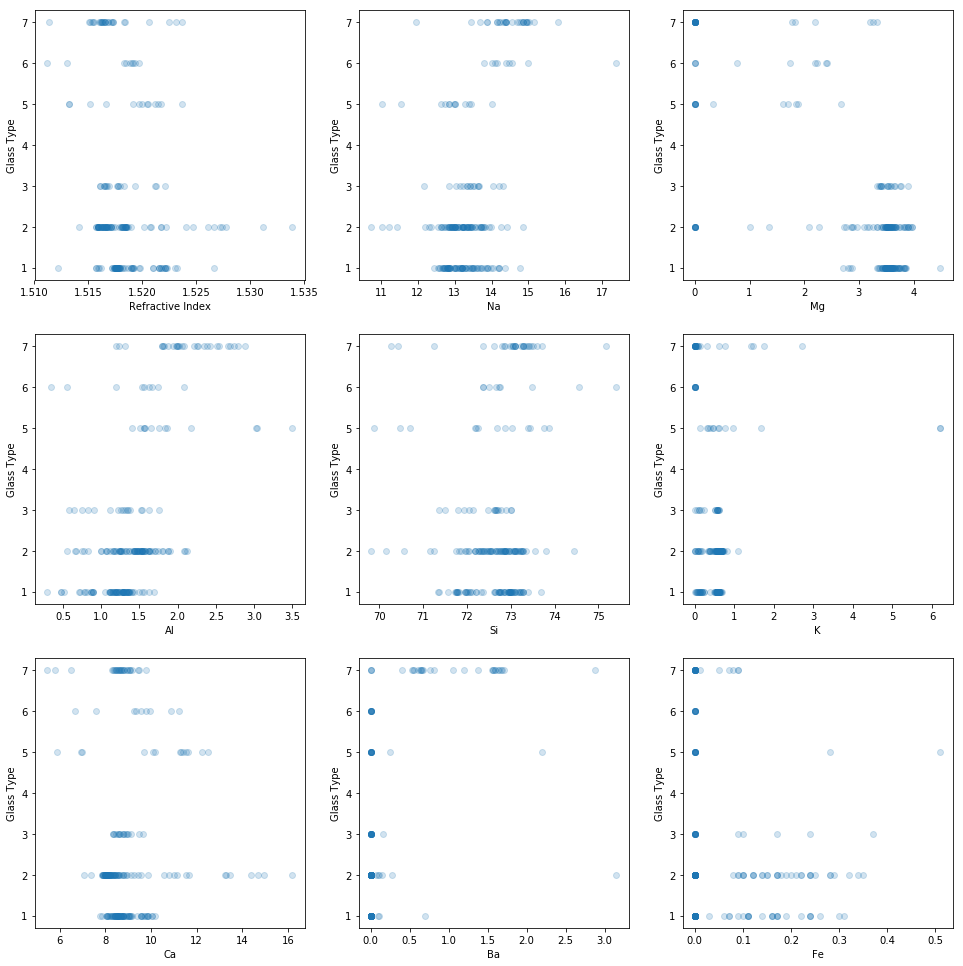

In [27]:
plt.figure(figsize=(10,10))
rows, cols=X.shape
for c in range(cols):
    plt.subplot(3,3, c+1)
    plt.plot(X[:,c],T,'o',alpha=.2)
    plt.ylabel(Tname)
    plt.xlabel(Xnames[c])
        # formatting space around the figures
    plt.subplots_adjust(right=1.4)
    plt.subplots_adjust(top=1.4)

There does not appear to be any data classified as 4 for some reason. Initial inspection also seems to indicate that most samples are a part of glass types 1, 2, and 7, leaving few samples for the rest. With such a small number of datapoints being spread unevenly, the classificiation may not perform well.

## Glass Results

## Results

In this section, we will be looking for

* clear explanations of each function;
* experiments with two different data sets with descriptions of the data;
* discussion of each result, including
  * accuracies as percent correctly classified,
  * best parameter values,
  * some analysis of each classification algorithm and how it is classifying the data by examining the $\mu$ values for LDA, and the first layer's weight values for the neural networks;
* and discuss which algorithm works best for each data set.

## Grading

Your notebook will be run and graded automatically. Download [A4grader.tar](http://www.cs.colostate.edu/~anderson/cs480/notebooks/A4grader.tar)  and extract A4grader.py from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect score of 80/100 if your functions are defined correctly. 

The remaining 20% will be based on your writing.  Be sure to explain each function, and details of the results summarized in the above section. 

## Check-in

Do not include this section in your notebook.

Name your notebook ```Lastname-A4.ipynb```.  So, for me it would be ```Anderson-A4.ipynb```.  Submit the file using the ```Assignment 4``` link on [Canvas](https://colostate.instructure.com/courses/41327).

Grading will be based on 

  * correct behavior of the required functions,
  * readability of the notebook,
  * effort in making interesting observations, and in formatting your notebook,
  * testing your code on two different classification data sets of your choice.

In [76]:
%run -i A4grader.py


   Testing   model = trainLDA(X,T)
             accuracy = evaluateLDA(model,X,T)

20/20 points. Accuracy is within 10 of correct value 50%

   Testing   model = trainNN(X,T, [[5],100])
             accuracy = evaluateNN(model,X,T)

30/30 points. Accuracy is within 10 of correct value 100%

  Testing
    resultsNN = ml.trainValidateTestKFoldsClassification( trainNN,evaluateNN, X,T, 
                                                          [ [ [0], 5], [ [10], 100] ],
                                                          nFolds=3, shuffle=False,verbose=False)
    bestParms = [row[0] for row in resultsNN]


30/30 points. You correctly find the best parameters to be [[10],100] for each fold.

C:\Users\Brad Pospeck\Desktop\Classes\Senior II\CS480\A4 CODING GRADE is 80/80

C:\Users\Brad Pospeck\Desktop\Classes\Senior II\CS480\A4 WRITING GRADE is ??/20

C:\Users\Brad Pospeck\Desktop\Classes\Senior II\CS480\A4 FINAL GRADE is ??/100

Remember, this python script is just an example of how